In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
from scipy.spatial import distance
import random
import pickle
from scipy import stats

import bokeh


# allow us to re-use the framework from the src directory
import sys, os
sys.path.append(os.path.abspath(os.path.join('../')))

import max_ent.examples.grid_9_by_9 as G
from max_ent.utility.support import *
from max_ent.gridworld import Directions


random.seed(123)
np.random.seed(123)

Set of constraints

In [4]:
## Set the grid
blue = [21,  9, 59,  1,  0, 20]
green = [42, 18, 76, 41, 23, 30]
cs = [63, 74, 13, 39, 48, 38]
ca = [Directions.DOWN_LEFT, Directions.UP_LEFT]
start =7
goal = 65

To generate random trajectories, you can use functions in max_ent/algorithms/gridworld_icrl.py there you can find procedures to generate random, optimal, and weighted trajectroies.


Generate nominal trajectories and plot them in the grid

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x113ba1d68>}


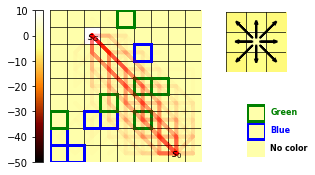

In [5]:
#blue, green, cs, ca, start, goal = generate_constraints(9)
n, n_cfg, demo_n, f1 = create_world('Nominal', blue, green, start=start, goal=goal)

Generate constrained trajectories and plot them in the grid. 
It is possible to change the set of constraints and generate a new set of trajectories with the following:
    
n_cfg = G.config_world(blue, green, cs, ca, cc, goal, start=start)
n = n_cfg.mdp
demo = G.generate_trajectories(n.world, n.reward, n.start, n.terminal, n_trajectories=1)

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x113ba1d68>}


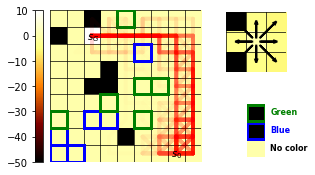

In [6]:
cc = [1, 2]
c, c_cfg, demo_c, f2 = create_world('Constrained', blue, green, cs, ca, cc, start=start, goal=goal, check=True)

When you generate a set of trajectoris, those are stored in a tuple (i.e., demo_c in this case) where the first element is the set of trajectories and the second element is the policy used to generate the trajectory.

The grid world is an object having functions to compute coords in the grid given the number of the state and vice-versa. You can find the code in max_ent/gridworld/gridworld.py (e.g., state_point_to_index(self, state)). Looking at the code it is possible to see that the first element of the trajectories list is the bottom-left state in the grid.

The list of the actions are stored in the class Directions that is in max_ent/gridworld/gridworld.py 

In [36]:
demo_c.policy

array([[2.70984130e-20, 2.60104473e-19, 2.29782787e-18, 2.70984130e-20,
        2.83891446e-38, 1.00000000e+00, 2.83891446e-38, 6.10010717e-21],
       [5.88367851e-21, 2.15782469e-02, 9.64520515e-01, 5.64745655e-20,
        5.22674146e-37, 1.39012382e-02, 5.91645203e-38, 1.27129549e-20],
       [5.36198567e-19, 1.45964791e-01, 5.86317191e-01, 2.04874973e-01,
        9.59384438e-18, 1.67237653e-02, 2.14633426e-19, 4.61192798e-02],
       [2.91741565e-01, 3.47823787e-01, 1.05791276e-01, 2.07853580e-01,
        8.74682579e-19, 1.17048523e-19, 2.17753909e-19, 4.67897923e-02],
       [1.13029345e-01, 5.89265589e-01, 2.82752225e-19, 1.89144178e-01,
        6.02687250e-20, 6.59827576e-02, 1.98153354e-19, 4.25781303e-02],
       [5.22250865e-02, 5.84241224e-01, 8.09325161e-02, 1.62703640e-01,
        8.17900869e-38, 8.32714162e-02, 1.70453420e-19, 3.66261169e-02],
       [6.67314048e-02, 3.96376258e-01, 1.51717382e-01, 2.39621176e-01,
        3.47747879e-20, 9.16128018e-02, 2.51034635e-19, 5.

The following code generates an empty set of trajetories so it is possible to plot the constrained grid re-using the existing code.

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x113ba1d68>}


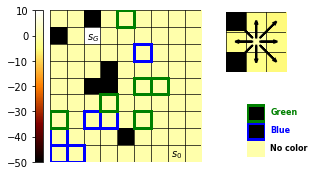

In [34]:
from max_ent.algorithms.gridworld_icrl import Demonstration
demo_test = Demonstration([], demo_c.policy)

import pickle as pkl
import numpy as np

fileName = 'qvalues'
fileObject = open(fileName, 'wb')
pkl.dump(demo_c.policy, fileObject)
fileObject.close()

f1 = G.plot_world(f'MCA', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_test, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)